# Import Libraries

In [437]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as plt
import seaborn as sns 
%matplotlib inline

# Set default matplot figure size
plt.rcParams['figure.figsize'] = (10.0, 8.0)

# Reading Data Set Using Pandas

In [438]:
demodata_df = pd.read_csv('demographic_data.csv')

# Analysis

In [439]:
# Check the first 5 rows of the data frame
demodata_df.head()

,in-store,age,items,amount,region
0,0,37,4,281.03,2
1,0,35,2,219.51,2
2,1,45,3,1525.70,4
3,1,46,3,715.25,3
4,1,33,4,1937.50,1


In [440]:
# Column names
demodata_df.columns

Index(['in-store', 'age', 'items', 'amount', 'region'], dtype='object')

In [441]:
# Information about the data set
demodata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   in-store  80000 non-null  int64  
 1   age       80000 non-null  int64  
 2   items     80000 non-null  int64  
 3   amount    80000 non-null  float64
 4   region    80000 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 3.1 MB


In [442]:
# Drop duplicates
demodata_df = demodata_df.drop_duplicates()

In [443]:
# Replace numeric codes for in-store and region with descriptive labels
demodata_df.loc[demodata_df['in-store'] == 1, 'trantype'] = 'in-store'
demodata_df.loc[demodata_df['in-store'] == 0, 'trantype'] = 'online'

demodata_df.loc[demodata_df['region'] == 1, 'regionname'] = 'North'
demodata_df.loc[demodata_df['region'] == 2, 'regionname'] = 'South'
demodata_df.loc[demodata_df['region'] == 3, 'regionname'] = 'East'
demodata_df.loc[demodata_df['region'] == 4, 'regionname'] = 'West'

In [444]:
# Number of transactions for in-store and online
demodata_df.groupby('trantype')['trantype'].count()

trantype
in-store    39990
online      39989
Name: trantype, dtype: int64

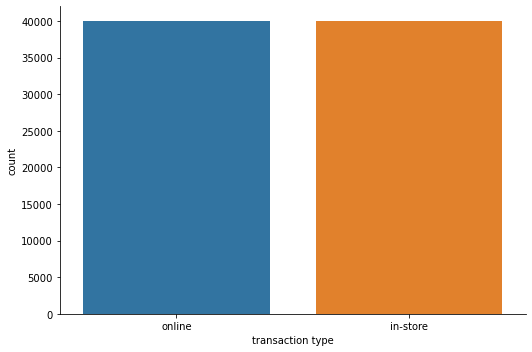

In [445]:
# Instead of a group by, use seaborn to plot the count of passengers in each class
fg = sns.catplot(x='trantype', data=demodata_df, kind='count', aspect=1.5)
fg.set_xlabels('transaction type')

As shown in the figure above, there are approximately the same number of in-store and online transactions.

In [446]:
# Number of transactions per region, grouped by online or in-store
demodata_df.groupby(['regionname','trantype'])['region'].count()

regionname  trantype
East        in-store    10999
            online       7001
North       in-store    15997
South       online      19994
West        in-store    12994
            online      12994
Name: region, dtype: int64

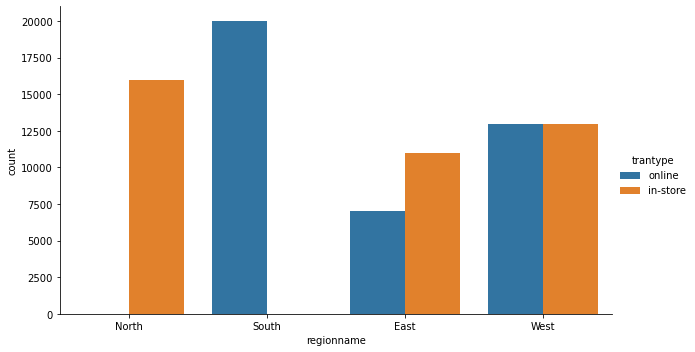

In [447]:
# Use seaborn to group by region and in-store
g = sns.catplot(x='regionname', data=demodata_df, hue='trantype', kind='count', aspect=1.75, order=['North','South','East','West'])

As shown in the figure above, North region does not have online transactions, and the South region does 
not have in-store transactions. The East region has more in-store than online transactions, and The West region 
has the same number of in-store and online transactions.

In [448]:
east = demodata_df[demodata_df['regionname']=='East']

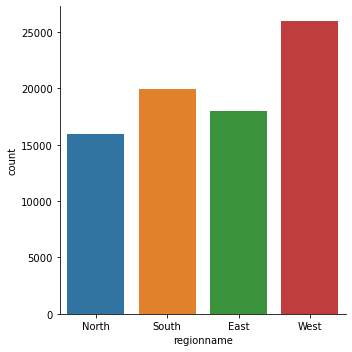

In [449]:
# Factor plot of total transactions by region
sns.catplot(x='regionname', data=demodata_df, kind='count', order=['North','South','East','West'])

In [450]:
# Total number of East region transactions
len(east)

18000

In [451]:
# number east region transactions grouped by transaction type and number of items
east.pivot_table('amount','items','trantype', aggfunc=len, margins=True)

trantype,in-store,online,All
items,,,
1,787,473,1260
2,1553,1023,2576
3,1583,1016,2599
4,1630,1045,2675
5,1563,950,2513
6,1551,964,2515
7,1562,1006,2568
8,770,524,1294
All,10999,7001,18000


In [452]:
# Items grouped by region, number of items purchased and amount spent
table = pd.crosstab(index=demodata_df.age, columns = [demodata_df.region, demodata_df.trantype], values = demodata_df.amount, aggfunc = 'mean')

In [453]:
table.unstack()

region  trantype  age
1       in-store  18             NaN
                  19      927.781981
                  20     1044.638263
                  21     1069.238243
                  22     1023.570522
                            ...     
4       online    81             NaN
                  82             NaN
                  83             NaN
                  84             NaN
                  85             NaN
Length: 408, dtype: float64

In [454]:
print('Average and median age of customers are %0.f and %0.f years old, respectively'%(demodata_df.age.mean(),demodata_df.age.median()))

Average and median age of customers are 46 and 45 years old, respectively


In [455]:
demodata_df.age.describe()

count    79979.000000
mean        45.758512
std         15.715158
min         18.000000
25%         33.000000
50%         45.000000
75%         56.000000
max         85.000000
Name: age, dtype: float64

In [456]:
# Drop missing values for the records in which age is missing
age = demodata_df['age'].dropna()

C:\Users\higgi\.conda\envs\course1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, "Distribution of Customers' Ages")

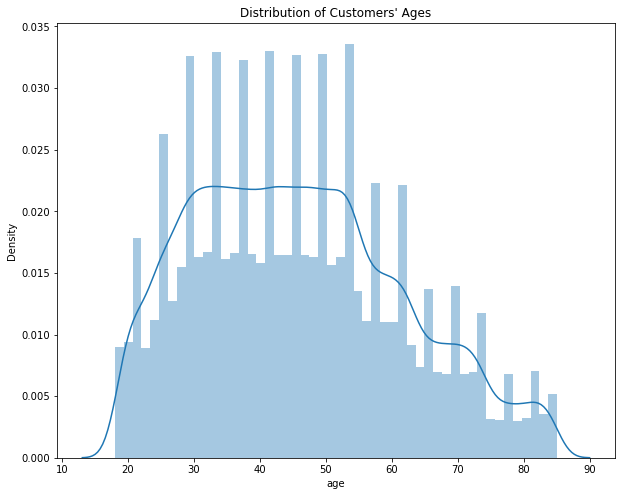

In [457]:
# Distribution of age, with an overlay of a density plot
age_dist = sns.distplot(age)
age_dist.set_title("Distribution of Customers' Ages")

<AxesSubplot:>

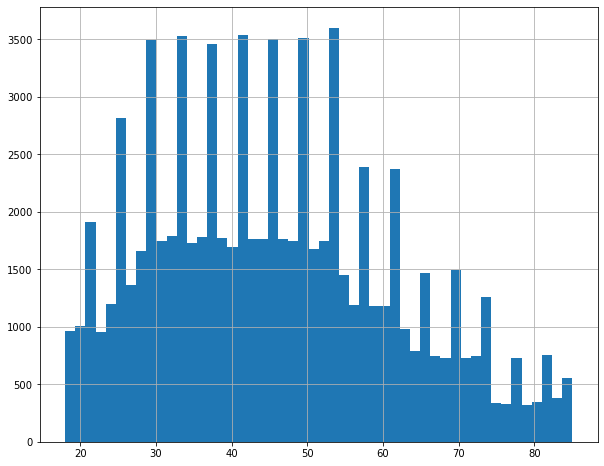

In [458]:
# Another way to plot a histogram of ages is shown below
demodata_df['age'].hist(bins=50)

In [459]:
# Create a function to group customers by age range
def age_range(age):
    
    if age < 20:
        return '<20'
    if age < 30:
        return '20-29'
    if age < 40:
        return '30-39'
    if age < 50:
        return '40-49'
    if age < 60:
        return '50-59'
    if age < 70:
        return '60-69'
    if age < 80:
        return '70-79'
    else:
        return '80+'

In [460]:
demodata_df['agerange'] = demodata_df['age'].apply(age_range)

In [461]:
# First 10 rows of the data frame
demodata_df[:10]

,in-store,age,items,amount,region,trantype,regionname,agerange
0,0,37,4,281.0300,2,online,South,30-39
1,0,35,2,219.5100,2,online,South,30-39
2,1,45,3,1525.7000,4,in-store,West,40-49
3,1,46,3,715.2500,3,in-store,East,40-49
4,1,33,4,1937.5000,1,in-store,North,30-39
5,0,24,3,1314.2000,4,online,West,20-29
6,0,43,6,8.5472,2,online,South,40-49
7,1,66,5,819.9800,3,in-store,East,60-69
8,1,51,5,908.3100,1,in-store,North,50-59
9,1,47,3,767.5400,1,in-store,North,40-49


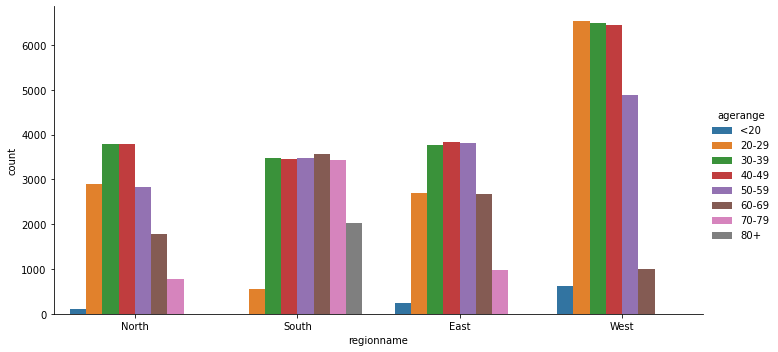

In [462]:
#factorplot of transactions grouped by region and age range.
sns.catplot(x='regionname', data=demodata_df, kind='count', hue='agerange', order=['North','South','East','West'],
            hue_order=['<20','20-29','30-39','40-49','50-59','60-69','70-79','80+'], aspect=2)

In [463]:
# Count number of transactions by age range
demodata_df['agerange'].value_counts()

30-39    17557
40-49    17518
50-59    15017
20-29    12671
60-69     9014
70-79     5198
80+       2038
<20        966
Name: agerange, dtype: int64

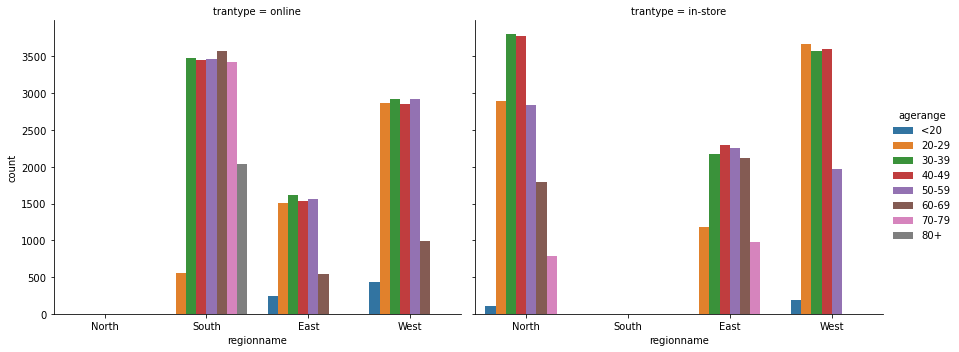

In [464]:
# Do the same as above, but split the transactions into either online or in-store
sns.catplot(x='regionname', data=demodata_df, kind='count', hue='agerange', col='trantype', order=['North','South','East','West'],
            hue_order=['<20','20-29','30-39','40-49','50-59','60-69','70-79','80+'], aspect=1.25, height=5)

The North region does not have online transactions, while the South region only has online transactions. The South region, 
has a large number of online transactions for customers over 80 years of age, more than any other region regardless of 
transaction type. The bulk of customers appear to be between the ages of 30 and 49 for in-store transactions, but for 
online transactions, the age spread runs mainly from 30-79. It would appear that online shopping appeals to a broader age range
than in-store shopping.

# kde plot, Distribution of Customers' Ages

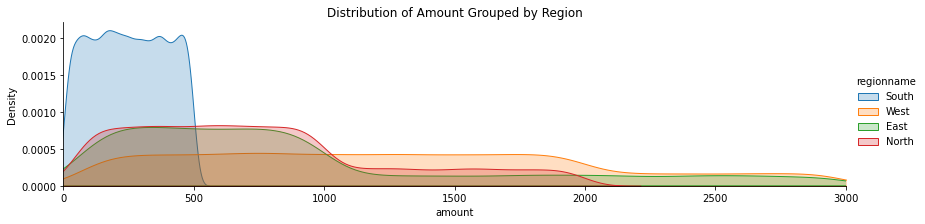

In [465]:
fig = sns.FacetGrid(demodata_df, hue='regionname', aspect = 4)
fig.map(sns.kdeplot,'amount',shade=True)
oldest = demodata_df['amount'].max()
fig.set(xlim=(0,oldest))
fig.set(title='Distribution of Amount Grouped by Region')
fig.add_legend()

From the plot above, the South region has more transactions under $500. The other regions have a broader range of amounts per transaction but skew toward transactions under \\$1000 for North and East, and under \\$2000 for the West region.

## How many items did the customers buy?

In [466]:
items = demodata_df['items'].dropna()
items.head()

0    4
1    2
2    3
3    3
4    4
Name: items, dtype: int64

In [467]:
# Grab the number of items
d = []
for c in items:
    d.append(c)

In [468]:
d[0:10]

[4, 2, 3, 3, 4, 3, 6, 5, 5, 3]

In [469]:
from collections import Counter
Counter(d)

Counter({4: 11594,
         2: 11284,
         3: 11486,
         6: 11519,
         5: 11233,
         7: 11376,
         1: 5699,
         8: 5788})

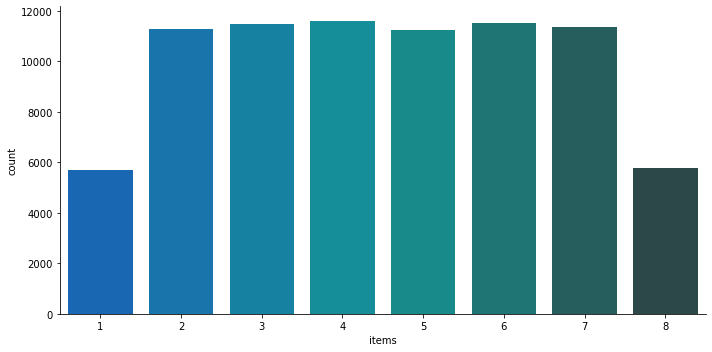

In [470]:
# Catplot the number of items. First transfer the d list into a data frame, then rename the column Items
items_df = DataFrame(d)
items_df.columns=['items']
sns.catplot(x='items', data=items_df, kind='count',order=[1,2,3,4,5,6,7,8], aspect=2, palette='winter_d')

## Breakout Amounts by Region

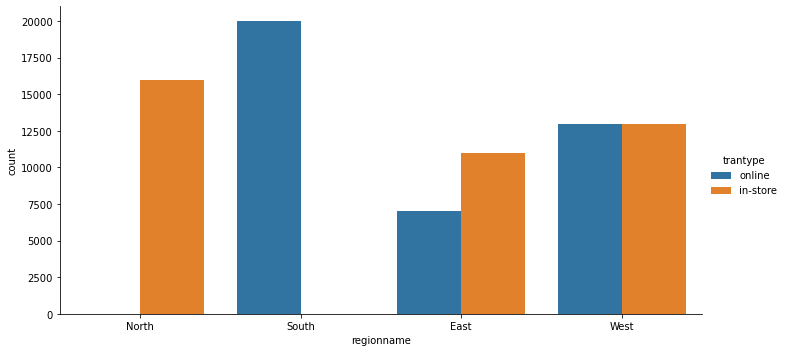

In [471]:
sns.catplot(x='regionname', data=demodata_df, kind='count', hue='trantype', hue_order=['online','in-store'], aspect=2,
               order=['North','South','East','West'])

In [472]:
demodata_df.regionname.value_counts()

West     25988
South    19994
East     18000
North    15997
Name: regionname, dtype: int64

In [473]:
#crosstab showing totals
tots = pd.crosstab(index=[demodata_df.regionname], columns=[demodata_df.trantype])
tots.columns = 'I','O'

In [474]:
tots

,I,O
regionname,,
East,10999,7001
North,15997,0
South,0,19994
West,12994,12994


In [475]:
tots.index

Index(['East', 'North', 'South', 'West'], dtype='object', name='regionname')

In [476]:
tots.columns

Index(['I', 'O'], dtype='object')

## Transaction Type and Amounts only

In [477]:
demodata_df[['trantype','amount']].head()

,trantype,amount
0,online,281.03
1,online,219.51
2,in-store,1525.70
3,in-store,715.25
4,in-store,1937.50


In [478]:
online_df = demodata_df[(demodata_df['trantype']=='online')]
instore_df = demodata_df[(demodata_df['trantype']=='in-store')]

In [479]:
[len(online_df),len(instore_df)]

[39989, 39990]

In [480]:
# First 5 rows of the dataframe
online_df.head()

,in-store,age,items,amount,region,trantype,regionname,agerange
0,0,37,4,281.0300,2,online,South,30-39
1,0,35,2,219.5100,2,online,South,30-39
5,0,24,3,1314.2000,4,online,West,20-29
6,0,43,6,8.5472,2,online,South,40-49
12,0,32,2,58.9970,2,online,South,30-39


In [481]:
# First 5 rows of the dataframe
instore_df.head()

,in-store,age,items,amount,region,trantype,regionname,agerange
2,1,45,3,1525.70,4,in-store,West,40-49
3,1,46,3,715.25,3,in-store,East,40-49
4,1,33,4,1937.50,1,in-store,North,30-39
7,1,66,5,819.98,3,in-store,East,60-69
8,1,51,5,908.31,1,in-store,North,50-59


In [482]:
demodata_df.head()

,in-store,age,items,amount,region,trantype,regionname,agerange
0,0,37,4,281.03,2,online,South,30-39
1,0,35,2,219.51,2,online,South,30-39
2,1,45,3,1525.70,4,in-store,West,40-49
3,1,46,3,715.25,3,in-store,East,40-49
4,1,33,4,1937.50,1,in-store,North,30-39


## Factors Affecting Online Transactions

In [483]:
demodata_df['online'] = demodata_df['in-store'].map({0:'yes',1:'no'})

In [484]:
demodata_df.head()

,in-store,age,items,amount,region,trantype,regionname,agerange,online
0,0,37,4,281.03,2,online,South,30-39,yes
1,0,35,2,219.51,2,online,South,30-39,yes
2,1,45,3,1525.70,4,in-store,West,40-49,no
3,1,46,3,715.25,3,in-store,East,40-49,no
4,1,33,4,1937.50,1,in-store,North,30-39,no


C:\Users\higgi\.conda\envs\course1\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


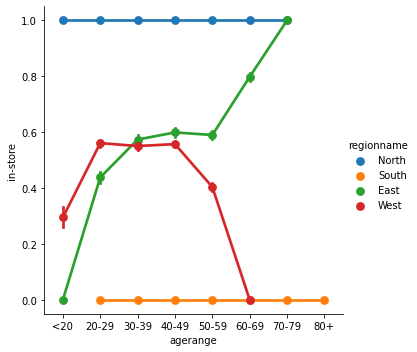

In [485]:
# Age Range and Amount grouped by Region
sns.factorplot(x='agerange',y='in-store', hue='regionname', data=demodata_df, 
               order=['<20','20-29','30-39','40-49','50-59','60-69','70-79','80+'],
               hue_order=['North','South','East','West'])

From the figure above, there are only in-store customers in the North region, and only online customers in the South region.
In the East region in-store sales increase with age, and in the West region in-store sales mainly decline with age after age 20.

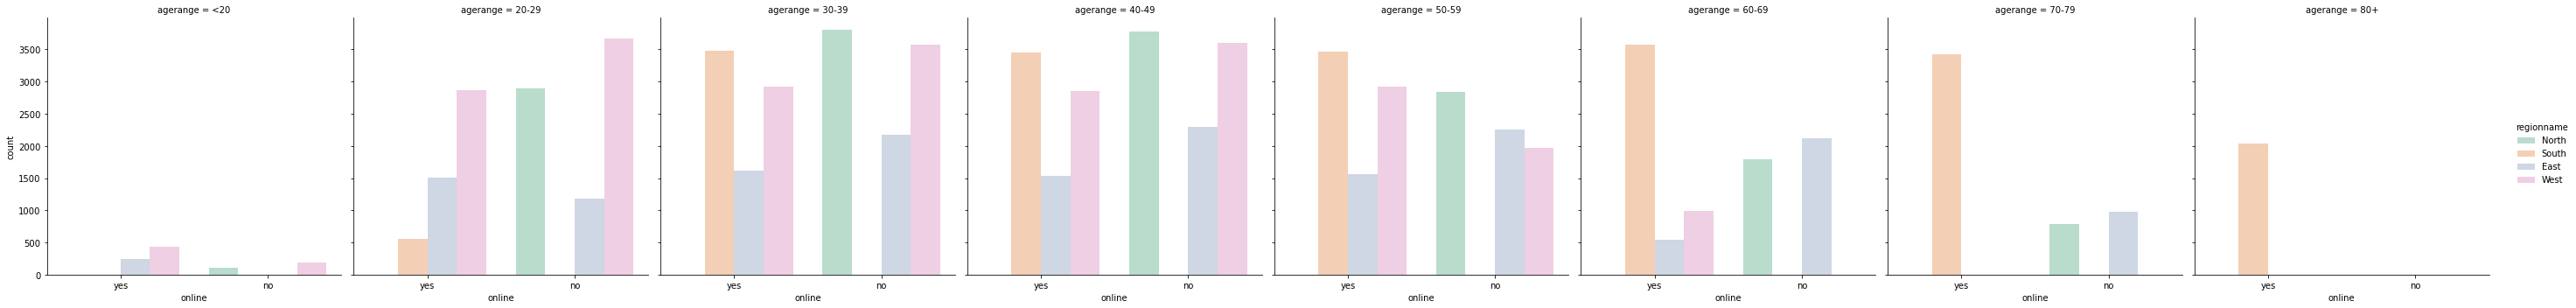

In [486]:
sns.catplot(x='online', data=demodata_df, hue='regionname', kind='count', palette='Pastel2', col='agerange',
            hue_order=['North','South','East','West'],
            col_order=['<20','20-29','30-39','40-49','50-59','60-69','70-79','80+'] )

## Items Purchased Factor

C:\Users\higgi\.conda\envs\course1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


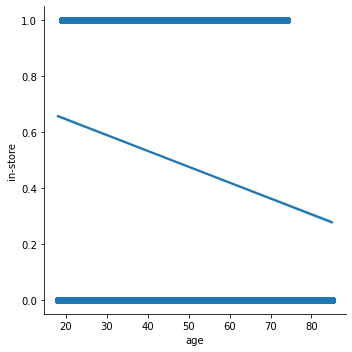

In [491]:
# Linear Plot of age vs in-store
sns.lmplot('age','in-store', data=demodata_df)

There seems to be a general linear trend between age and in-store purchases. The plot shows that the older a person is, the lower chance he/she would purchase in-store.

C:\Users\higgi\.conda\envs\course1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


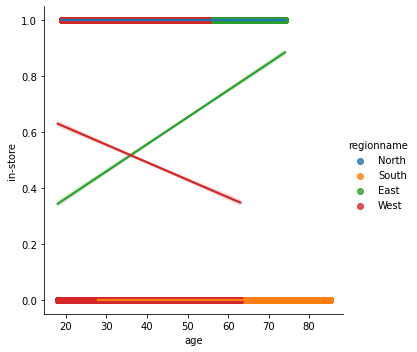

In [497]:
# Age vs in-store grouped by region
sns.lmplot('age','in-store', hue='regionname', data=demodata_df, hue_order = ['North','South','East','West'])

In this plot, we see an increasing likelihood of East region customers shopping in store as they age, and the opposite for West region customers. 

C:\Users\higgi\.conda\envs\course1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


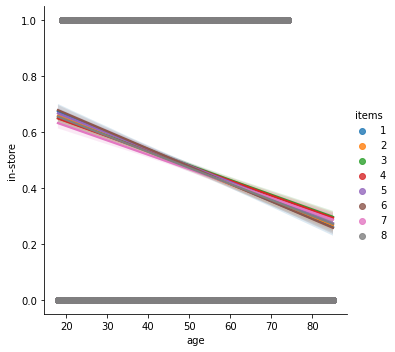

In [502]:
# age vs in-store grouped by number of items purchased
sns.lmplot('age','in-store',hue='items', data=demodata_df, hue_order = range(1,9))

It appears that in all cases, the number of items purchased in-store declines with age.

C:\Users\higgi\.conda\envs\course1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


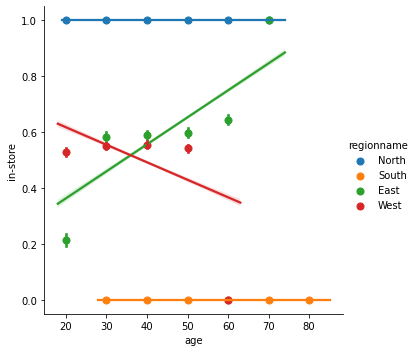

In [506]:
#by age group
generations = [10,20,30,40,50,60,70,80,90]
sns.lmplot('age','in-store',hue='regionname',data=demodata_df, x_bins=generations, hue_order=['North','South','East','West'])

In [507]:
demodata_df.columns

Index(['in-store', 'age', 'items', 'amount', 'region', 'trantype',
       'regionname', 'agerange', 'online'],
      dtype='object')

In [509]:
demodata_DF = demodata_df.dropna(subset=['items'])

In [510]:
d[0:10]

[4, 2, 3, 3, 4, 3, 6, 5, 5, 3]

In [512]:
len(demodata_DF), len(d)

(79979, 79979)

In [513]:
demodata_DF['ItemsPurchased'] = d

In [514]:
demodata_DF.head()

,in-store,age,items,amount,region,trantype,regionname,agerange,online,ItemsPurchased
0,0,37,4,281.03,2,online,South,30-39,yes,4
1,0,35,2,219.51,2,online,South,30-39,yes,2
2,1,45,3,1525.70,4,in-store,West,40-49,no,3
3,1,46,3,715.25,3,in-store,East,40-49,no,3
4,1,33,4,1937.50,1,in-store,North,30-39,no,4


C:\Users\higgi\.conda\envs\course1\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\higgi\.conda\envs\course1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


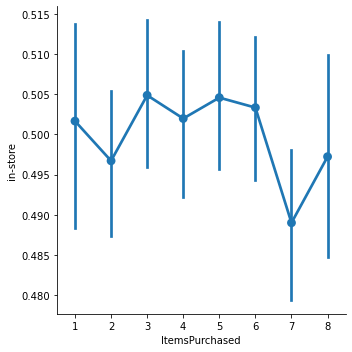

In [515]:
sns.factorplot('ItemsPurchased','in-store', data=demodata_DF, order=range(1,9))

There does not seem to be any relation between in-store purchases and the number of items purchased.

C:\Users\higgi\.conda\envs\course1\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\higgi\.conda\envs\course1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


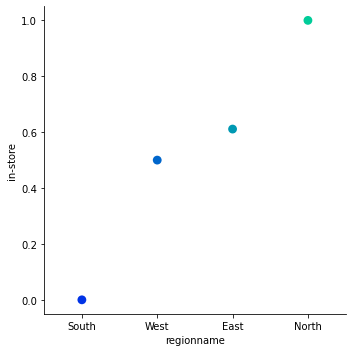

In [528]:
sns.factorplot('regionname', 'in-store', data=demodata_df, palette='winter')

It appears that online purchases are higher for the South and West regions, and less for the East and North regions.

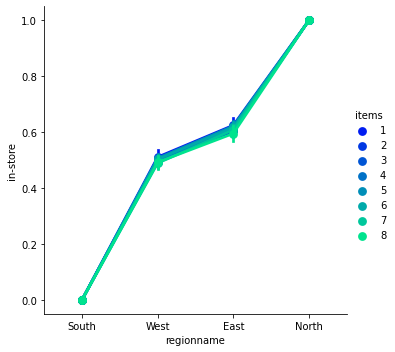

In [527]:
sns.factorplot('regionname','in-store', data=demodata_df, palette='winter', hue='items', hue_order = range(1,9))

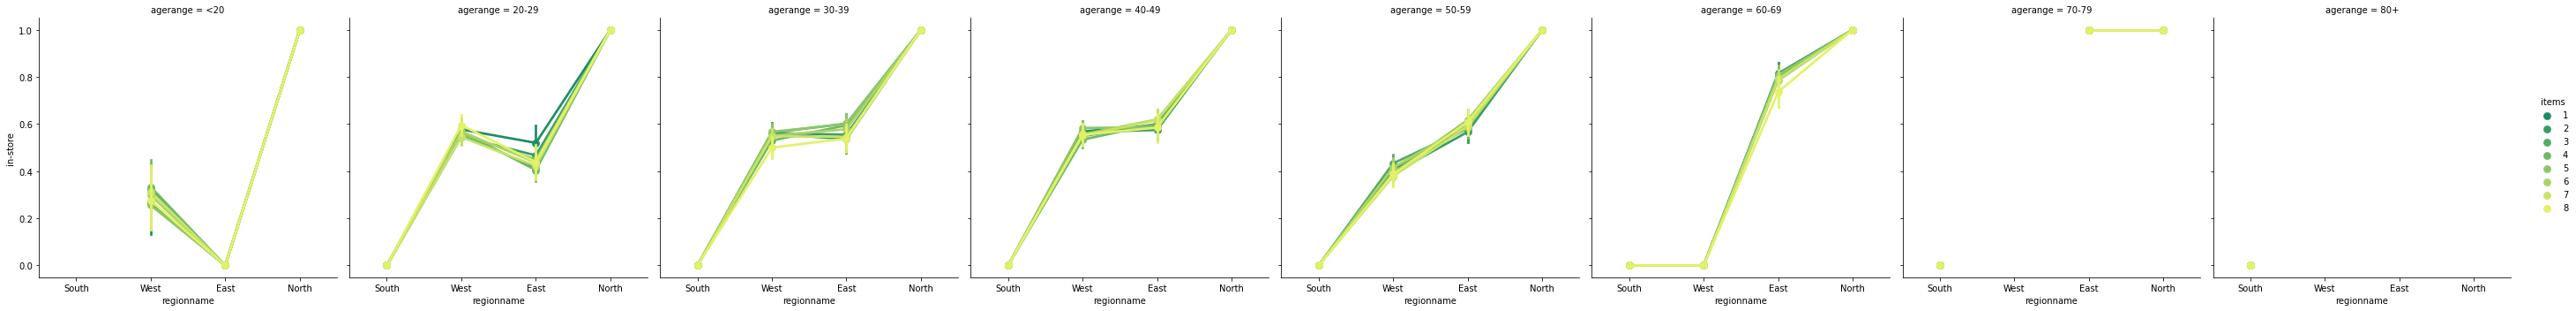

In [531]:
sns.factorplot('regionname','in-store', data=demodata_df, palette='summer',hue='items',
    hue_order=range(1,9), col='agerange', col_order=['<20','20-29','30-39','40-49','50-59','60-69','70-79','80+'] )